<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Gapminder</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

%matplotlib inline

We download the data we'll be using. 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DataForScience/DataViz/master/data/gapminder.csv')

Let's take a look at the data

In [3]:
data.head()

,Country,GDP,Population,LifeExpectancy,Continent
0,Algeria,6223.367465,33333216,72.301,0
1,Angola,4797.231267,12420476,42.731,0
2,Benin,1441.284873,8078314,56.728,0
3,Botswana,12569.851770,1639131,50.728,0
4,Burkina Faso,1217.032994,14326203,52.295,0


As we can see, there are several features associated with each country. Here we will create a Bubble plot to encode all 4 features in a single plot:

-  GDP - x-axis, log scale
-  Life Expectancy - y-axis, linear scale
-  Population - bubble size/area
-  Continent - bubble color

We start by setting the color palette we'll be using

In [4]:
colors = [
    '#51a7f9', 
    '#cf51f9', 
    '#70bf41', 
    '#f39019', 
    '#f9e351']

sns.set_palette(palette=colors)

And replace continent number by names

In [5]:
continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

data.Continent = data.Continent.map(lambda x: continents[x])

Seaborn has some issues handling this specific dataset due to the wide range of the GDP and population variables

<AxesSubplot:xlabel='GDP', ylabel='LifeExpectancy'>

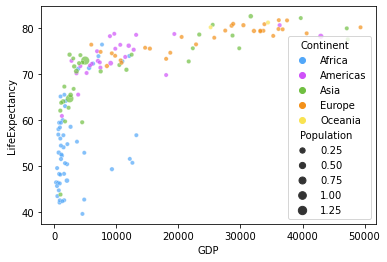

In [6]:
sns.scatterplot(data=data, x='GDP', y='LifeExpectancy', 
                hue='Continent', size='Population', 
                alpha=0.7 # Make symbols transparent
                    )

We can force it to make the symbols larger

<AxesSubplot:xlabel='GDP', ylabel='LifeExpectancy'>

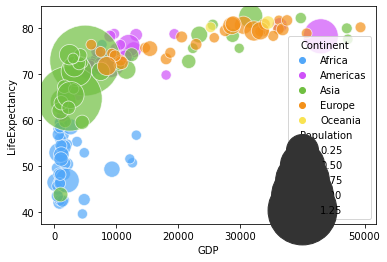

In [7]:
sns.scatterplot(data=data, x='GDP', y='LifeExpectancy', 
                hue='Continent', size='Population', 
                sizes=(100, 5000), # Define the minimum/maximum symbol size
                alpha=0.7, # Make symbols transparent,
                    )

Which while better still has some issues. Fortunately, those are relatively easy to fix by using matplotlib directly on the figure generated by seaborn

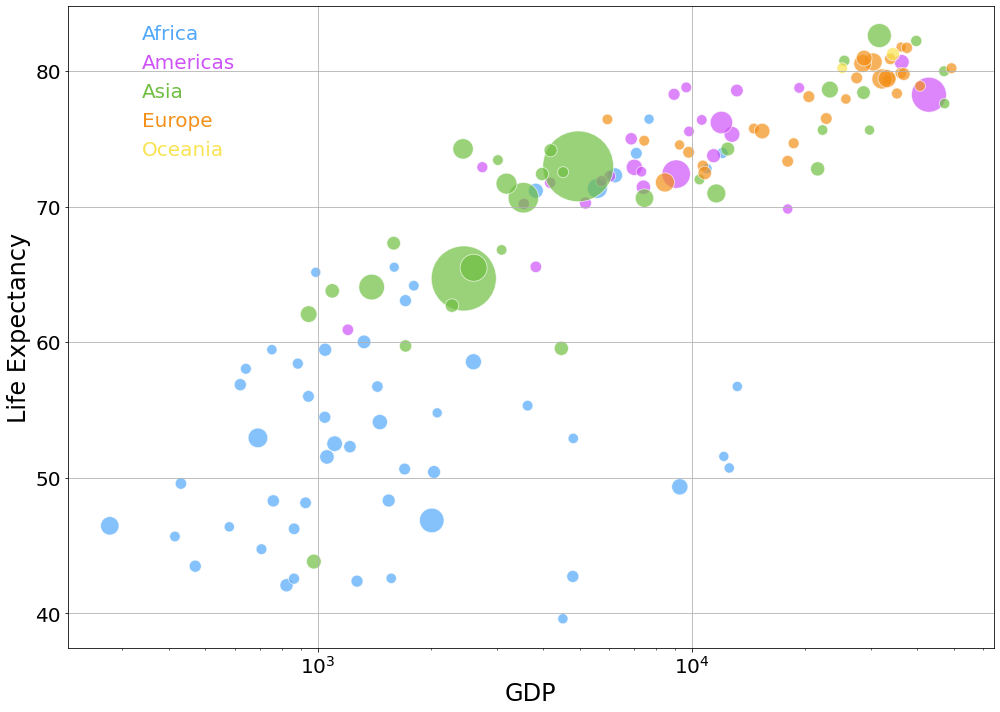

In [8]:
ax = sns.scatterplot(data=data, x='GDP', y='LifeExpectancy', 
                hue='Continent', size='Population', 
                sizes=(100, 5000), # Define the minimum/maximum symbol size
                alpha=0.7 # Make symbols transparent
                    )

# Get legend handles
handles, labels = ax.get_legend_handles_labels()

# Keep only the hue legend and remove the symbols
ax.legend(handles[1:6],labels[1:6], # Skip the first handle (title)
          fontsize=20, # Make the font larger
          markerscale=0, # Remove the symbos
          labelcolor=colors, # Use the respective colors
          frameon=False # Remove the legend frame
         )

# Set the correct labels
ax.set_xlabel('GDP', fontsize=24.0)
ax.set_ylabel('Life Expectancy', fontsize=24.0)

# Add gridlines
ax.grid(True)

# Make the x-axis log scale
ax.set_xscale('log')

# Increase tick mark font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Make figure larger
fig = plt.gcf()
fig.set_size_inches(14, 10)
fig.tight_layout()

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>